In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data_path = '../data/HouseholdIncomeDataset.csv'
df = pd.read_csv(data_path)

# Display the first few rows
df.head()

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210


#### Data Description

In [12]:
# Display basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             10000 non-null  int64 
 1   Education_Level                 10000 non-null  object
 2   Occupation                      10000 non-null  object
 3   Number_of_Dependents            10000 non-null  int64 
 4   Location                        10000 non-null  object
 5   Work_Experience                 10000 non-null  int64 
 6   Marital_Status                  10000 non-null  object
 7   Employment_Status               10000 non-null  object
 8   Household_Size                  10000 non-null  int64 
 9   Homeownership_Status            10000 non-null  object
 10  Type_of_Housing                 10000 non-null  object
 11  Gender                          10000 non-null  object
 12  Primary_Mode_of_Transportation  10000 non-null 

In [13]:
# Check missing values
print(df.isnull().sum())

Age                               0
Education_Level                   0
Occupation                        0
Number_of_Dependents              0
Location                          0
Work_Experience                   0
Marital_Status                    0
Employment_Status                 0
Household_Size                    0
Homeownership_Status              0
Type_of_Housing                   0
Gender                            0
Primary_Mode_of_Transportation    0
Income                            0
dtype: int64


In [14]:
# Get summary statistics for all variables (both quantitative and qualitative)
df.describe(include='all')


,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
count,10000.000000,10000,10000,10000.000000,10000,10000.000000,10000,10000,10000.000000,10000,10000,10000,10000,1.000000e+04
unique,NaN,4,5,NaN,3,NaN,3,3,NaN,2,3,2,4,NaN
top,NaN,Bachelor's,Healthcare,NaN,Urban,NaN,Married,Full-time,NaN,Own,Single-family home,Male,Public transit,NaN
freq,NaN,4058,3035,NaN,7037,NaN,5136,5004,NaN,6018,4055,5123,4047,NaN
mean,44.021700,NaN,NaN,2.527000,NaN,24.858800,NaN,NaN,3.989600,NaN,NaN,NaN,NaN,8.168382e+05
std,15.203998,NaN,NaN,1.713991,NaN,14.652622,NaN,NaN,2.010496,NaN,NaN,NaN,NaN,1.821089e+06
min,18.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,3.104400e+04
25%,31.000000,NaN,NaN,1.000000,NaN,12.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,6.844600e+04
50%,44.000000,NaN,NaN,3.000000,NaN,25.000000,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,7.294300e+04
75%,57.000000,NaN,NaN,4.000000,NaN,37.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,3.506675e+05


#### Variable Types

In [11]:
# Identify variable types
qualitative = df.select_dtypes(include=['object', 'category']).columns.tolist()
quantitative = df.select_dtypes(include=['number']).columns.tolist()

# Make both lists the same length for tabular display
max_len = max(len(quantitative), len(qualitative))
quantitative += [''] * (max_len - len(quantitative))
qualitative += [''] * (max_len - len(qualitative))

# Create a DataFrame for display
variables_df = pd.DataFrame({
    'Quantitative': quantitative,
    'Qualitative': qualitative
})

# Display the table
variables_df

,Quantitative,Qualitative
0,Age,Education_Level
1,Number_of_Dependents,Occupation
2,Work_Experience,Location
3,Household_Size,Marital_Status
4,Income,Employment_Status
5,,Homeownership_Status
6,,Type_of_Housing
7,,Gender
8,,Primary_Mode_of_Transportation


#### Model Estimation: Multiple Linear Regression

Mean Squared Error: 3136367852509.854
R²: 0.005862187302471122


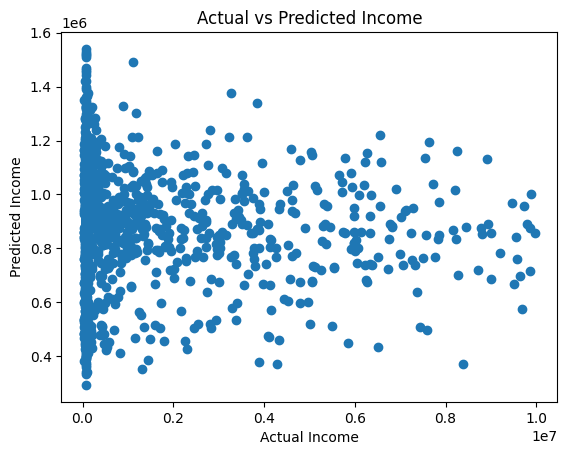

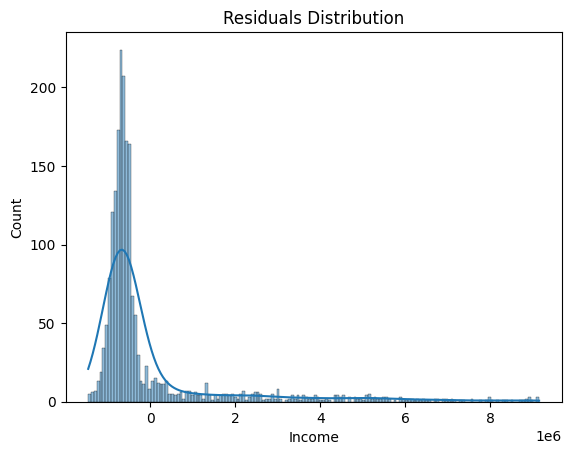

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocess categorical variables (one-hot encoding)
df_encoded = pd.get_dummies(df, drop_first=True)

# Define independent variables (X) and dependent variable (y)
X = df_encoded.drop(columns=['Income'])
y = df_encoded['Income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R²: {r2}")

# Visualization
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Income")
plt.ylabel("Predicted Income")
plt.title("Actual vs Predicted Income")
plt.show()

# Residuals plot
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()